In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import datetime as dt
import glob
import os
import pandas as pd

from pyxlma.lmalib.io import read
from pyxlma.plot.xlma import XlmaPlot

%matplotlib inline

In [3]:
files_grabbed = sorted(glob.glob('../test/vanna/kinda/L*'))
lma_data, starttime = read.dataset(files_grabbed)
print(starttime)


lf = read.lmafile(files_grabbed[0])
# Station info comes from the last file read.
# stations = lma_file.stations

# Will need to add logic to check for existing data and do something else if it is
# if len(lma_data) > 0:
#     lma_data.sort_values('Datetime', inplace=True)
    
dttuple = [starttime, starttime+dt.timedelta(minutes=10)]
# dttuple = lma_data.Datetime.min(), lma_data.Datetime.max()
tstring = 'Oklahoma LMA {}-{}'.format(dttuple[0].strftime('%H%M'),
                                      dttuple[1].strftime('%H%M UTC %d %B %Y '))

2020-04-12 02:20:00


In [4]:
print(lma_data.event_chi2.attrs['valid_range'])
print(lma_data.event_stations.attrs['valid_range'])
print(lma_data.event_time.encoding)
print(lma_data)

[0.0, 5.0]
[6, 255]
{'units': 'seconds since 2020-04-12 00:00:00 +00:00'}
<xarray.Dataset>
Dimensions:                      (number_of_events: 276737, number_of_stations: 18)
Dimensions without coordinates: number_of_events, number_of_stations
Data variables:
    network_center_latitude      float64 35.28
    network_center_longitude     float64 -97.92
    network_center_altitude      float64 417.9
    station_latitude             (number_of_stations) float32 35.00434 ... 34.711586
    station_longitude            (number_of_stations) float32 -97.907295 ... -99.08027
    station_altitude             (number_of_stations) float32 346.0 ... 415.89996
    station_event_fraction       (number_of_stations) float32 90.76 ... 97.26
    station_power_ratio          (number_of_stations) float32 2.2860003 ... 1.0579998
    event_latitude               (number_of_events) float32 35.321556 ... 35.534714
    event_longitude              (number_of_events) float32 -97.97448 ... -97.737
    event_alti

[datetime.datetime(2020, 4, 12, 2, 20), datetime.datetime(2020, 4, 12, 2, 30)]


/Users/vannac/opt/anaconda3/envs/sckimage/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/Users/vannac/opt/anaconda3/envs/sckimage/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


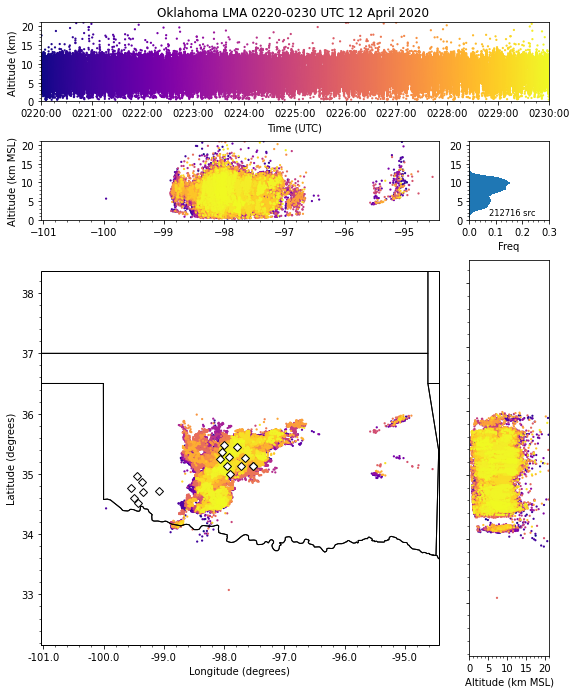

In [5]:
clat, clon = 35.26707931, -97.73839823
xlim = [clon-3.3, clon+3.3]
ylim = [clat-3.1, clat+3.1]
print(dttuple)
try:
    del(xp)
except:
    pass

xp = XlmaPlot(lma_data,dttuple[0],subplot_labels=False, bkgmap=True,
              readtype='xarray', cmap='plasma', s=5,
              zlim=[0, 21], chi2=1, normed=False,
              tlim=dttuple, xlim=xlim, ylim=ylim, title=tstring)

stn_art = xp.ax_plan.plot(lma_data['station_longitude'], lma_data['station_latitude'], 'wD', mec='k', ms=5)

# plt.savefig('./images/' + dttuple[0].strftime('%y%m%d') +
#             '/relampago_points_' + dttuple[0].strftime('%Y%m%d_%H%M.png'))

/Users/vannac/opt/anaconda3/envs/sckimage/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/Users/vannac/opt/anaconda3/envs/sckimage/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


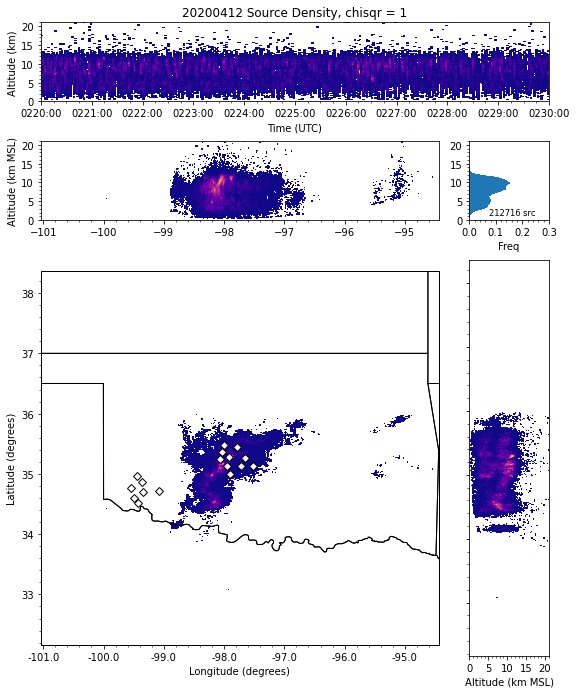

In [6]:
try:
    del(xp)
except:
    pass

xp = XlmaPlot(lma_data,dttuple[0],subplot_labels=False, bkgmap=True,
              readtype='xarray',  cmap='plasma', s=5, density=True,
              zlim=[0, 21], chi2=1, normed=True,
              tlim=dttuple, xlim=xlim, ylim=ylim)

stn_art = xp.ax_plan.plot(lma_data['station_longitude'], lma_data['station_latitude'], 'wD', mec='k', ms=5)

/Users/vannac/opt/anaconda3/envs/sckimage/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/Users/vannac/opt/anaconda3/envs/sckimage/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


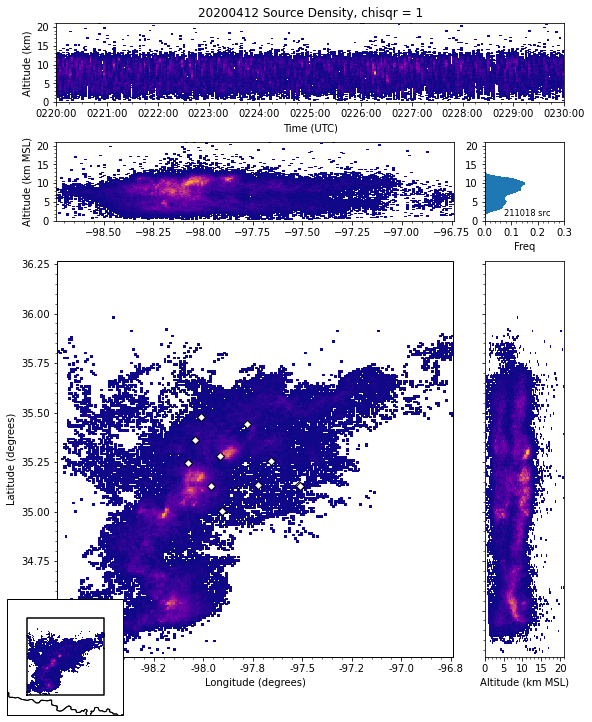

In [11]:
xlim = [clon-1, clon+1]
ylim = [clat-1, clat+1]

try: del(xp)
except: pass

xp = XlmaPlot(lma_data,dttuple[0],subplot_labels=False,bkgmap=True,
              readtype='xarray',  cmap='plasma', s=5,
              zlim=[0, 21], chi2=1, density=True,
              tlim=dttuple, normed=True,
              xlim=xlim, ylim=ylim,
              inset=True,inset_buffer=0.5,inset_size=0.17,
             )

stn_art = xp.ax_plan.plot(lma_data['station_longitude'], lma_data['station_latitude'], 'wD', mec='k', ms=5)

### Pandas reader + empty data image

In [ ]:
files_grabbed = sorted(glob.glob('../test/vanna/not/L*'))
lma_data = pd.DataFrame()

for i in range(10):
    # print (sorted(files_grabbed, key=os.path.getctime)[-(i+2)])
    lma_file = read.lmafile(sorted(files_grabbed, key=os.path.getctime)[-(i+1)])
    # Accounting for empty files
    try:
        lma_data = lma_data.append(lma_file.readfile())
    except:
        pass
    
stations = lma_file.stations

# Will need to add logic to check for existing data and do something else if it is
if lma_data.size>0:
    lma_data.sort_values('Datetime', inplace=True)

tstring = 'Oklahoma LMA {}-{}'.format(lma_file.starttime.strftime('%H%M'),(
lma_file.starttime+dt.timedelta(minutes=10)).strftime('%H%M UTC %d %B %Y '))

clat, clon = 35.26707931, -97.73839823
xlim = [clon-1, clon+1]
ylim = [clat-1, clat+1]

dttuple = [lma_file.starttime,
           lma_file.starttime + dt.timedelta(minutes=10)]

/Users/vannac/opt/anaconda3/envs/sckimage/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/Users/vannac/opt/anaconda3/envs/sckimage/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


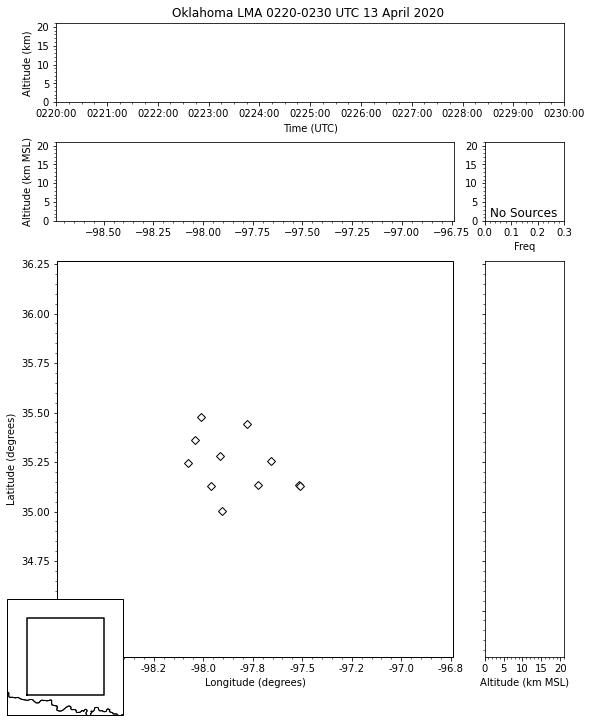

In [17]:
try: del(xp)
except: pass

xp = XlmaPlot(lma_data,lma_file.starttime,subplot_labels=False,bkgmap=True,
              readtype='pandas',  cmap='plasma', s=5,
              zlim=[0, 21], chi2=1, density=True,
              tlim=dttuple, 
              xlim=xlim, ylim=ylim,
              inset=True,inset_buffer=0.5,inset_size=0.17,
              title = tstring,
             )

xp.ax_plan.plot(stations['Long'], stations['Lat'], 'wD', mec='k', ms=5)

In [6]:
# gsize = 0.025
# lon_edges = np.arange(xlim[0],xlim[1],gsize)
# lat_edges = np.arange(ylim[0],ylim[1],gsize)
# # lat_c = (lat_edges[1:]+lat_edges[:-1])/2
# # lon_c = (lon_edges[1:]+lon_edges[:-1])/2

# glat_edges, glon_edges = np.meshgrid(lat_edges,lon_edges)

# plan_hist, _, _ = np.histogram2d(lma_data.lon.values, lma_data.lat.values, 
#                bins = [lon_edges,lat_edges])

In [7]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
print(matplotlib.__version__)
print(matplotlib.get_backend())

3.2.1
module://ipykernel.pylab.backend_inline


In [8]:
t = np.array(['2020-04-02T23:00:00.749079563', '2020-04-02T23:00:00.749083039',
              '2020-04-02T23:00:01.792519894', '2020-04-02T23:00:01.793246307',
              '2020-04-02T23:00:01.793248355', '2020-04-02T23:00:01.795347666',
              '2020-04-02T23:00:01.796964828', '2020-04-02T23:00:01.798717183',
              '2020-04-02T23:00:01.800349212', '2020-04-02T23:00:01.801143192'],
      dtype='datetime64[ns]')
tlim = np.array(['2020-04-02T23:00:00', '2020-04-02T23:00:02'],
      dtype='datetime64[ns]')
z = np.arange(t.shape[0], dtype=float)

(737517.9583333334, 737517.9583564815)

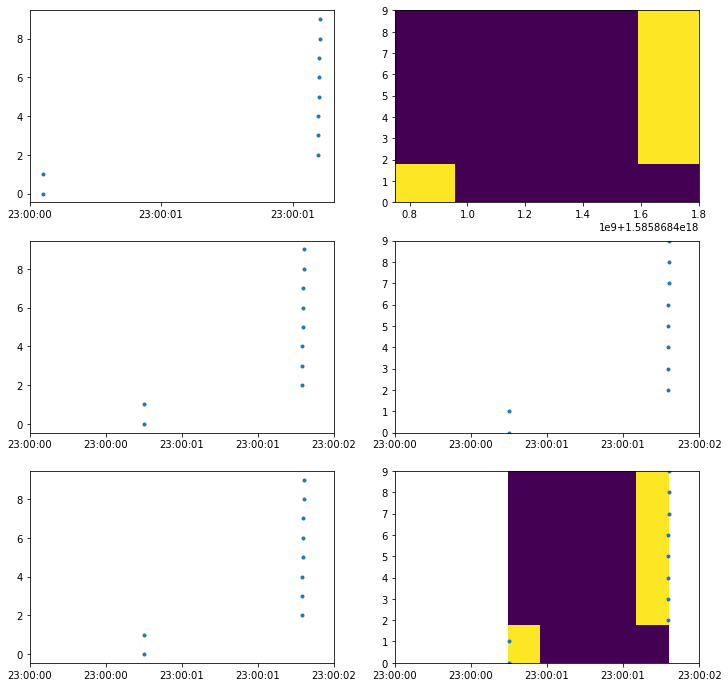

In [9]:
fig, ax = plt.subplots(3,2, figsize=(12,12))
# plot with no axis control
ax[0,0].plot(t, z, '.')
ax[0,1].hist2d(t, z, bins=[5, 5])

# set axes to expected range with default time handling
# plot works, hist2d doesnt.
ax[1,0].plot(t, z, '.')
ax[1,0].set_xlim(tlim[0], tlim[1])
ax[1,1].hist2d(t, z, bins=[5, 5])
ax[1,1].plot(t, z, '.')
ax[1,1].set_xlim(tlim[0], tlim[1])

# manually converting dates fixes hist2d
ax[2,0].plot(t, z, '.')
ax[2,0].set_xlim(tlim[0], tlim[1])

ax[2,1].hist2d(matplotlib.dates.date2num(t), z, bins=[5, 5])
ax[2,1].plot(t, z, '.')
ax[2,1].set_xlim(tlim[0], tlim[1])